<a href="https://colab.research.google.com/github/zahraaghapour/BigData_Final_Project/blob/master/StyleGAN_Image_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Colab Notebook for Face editing with Generative Adversarial Networks**

> ## *For further learning you can use these links, they will help you to understand the problem well:*
> *  [https://towardsdatascience.com/fun-with-stylegan-lets](https://towardsdatascience.com/fun-with-stylegan-lets-predict-the-tesla-cybertruck-design-3f2123ab4d0d) 
*   [Interpreting the Latent Space of GANs for Semantic Face Editing](https://arxiv.org/pdf/1907.10786.pdf)
*   [Image2StyleGAN_How_to_Embed_Images_Into_the_StyleGAN_Latent_Space](http://openaccess.thecvf.com/content_ICCV_2019/papers/Abdal_Image2StyleGAN_How_to_Embed_Images_Into_the_StyleGAN_Latent_Space_ICCV_2019_paper.pdf)








 # First to run this demo StyleGAN code, make a local copy of this notebook in your drive!



## Before you move on, make sure you have GPU acceleration enabled:
> ### Click 'Runtime' in the menu tab at the top
> ### Click 'Change runtime type'
> ### Make sure the hardware accelerator is set to 'GPU'


 #### 1.   Upgrade tqdm:

In [1]:
!pip install --upgrade tqdm

     |████████████████████████████████| 61kB 1.8MB/s 
  Found existing installation: tqdm 4.28.1
    Uninstalling tqdm-4.28.1:
      Successfully uninstalled tqdm-4.28.1


#### 2. Restart the Python kernel to load the updated version:

StyleGAN is a massive model that can take weeks to train. So for this tutorial, we're going to use a pretrained model that Nvidia open-sourced. You can find the official implementation [here](https://github.com/NVlabs/stylegan).

But here, we're going to use a version of that repo that is modified [in this github repo](https://github.com/zahraaghapour/BigData_Final_Project). (building on original work from Puzer)[ git_hub](https://github.com/Puzer/stylegan-encoder.git)

we appreciate them for thier StyleGAN Encoder. You can study [this repo](https://github.com/Puzer/stylegan-encoder.git) for more details.

In [1]:
!rm -rf sample_data
!git clone https://github.com/zahraaghapour/BigData_Final_Project

Cloning into 'BigData_Final_Project'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 30 (delta 2), reused 30 (delta 2), pack-reused 0
Unpacking objects: 100% (30/30), done.



#### 3. cd into the repo folder



In [3]:
cd BigData_Final_Project

/content/BigData_Final_Project



#### 4. Make Folders for saving our Images



In [0]:
rm -rf aligned_images raw_images

In [0]:
mkdir aligned_images raw_images

## Some tips for the images:


*   Use HD images (preferably > 1000x1000 pixels)
*   Make sure your face is not too small
*   Neutral expressions & front facing faces will give better results
*   Clear, uniform lighting conditions are also recommened

#### Upload Images Manually

*   Click the '>' icon in the panel on the top left 
*   Go to the 'Files' tab
*   Unfold the stylegan-encoder folder (left-click)
*   Right click the 'stylegan-encoder/raw_images' folder and click "upload"

#### 5. Check TensorFlow version (1.15):




In [6]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

1.15.0



## What is Auto-Aligning faces:
*   Look for faces in the images
*   Crop out the faces from the images
* Align the faces (center the nose and make the eyes horizontal)
* Rescale the resulting images and save them in "aligned_images" folder

In [7]:
!python align_images.py raw_images/ aligned_images/ --output_size=1024

Using TensorFlow backend.
64045056/64040097 [==============================] - 4s 0us/step
Aligning meghan.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/meghan_01.png


### 6. let's download a pretrained resnet encoder: 
 * This model takes an image as input and estimates the corresponding latent 
code

In [8]:
!gdown https://drive.google.com/uc?id=1aT59NFy9-bNyXjDuZOTMl0qX0jmZc6Zb
!mkdir data
!mv finetuned_resnet.h5 data
!rm -rf generated_images latent_representations

Downloading...
From: https://drive.google.com/uc?id=1aT59NFy9-bNyXjDuZOTMl0qX0jmZc6Zb
To: /content/BigData_Final_Project/finetuned_resnet.h5
330MB [00:04, 82.1MB/s]


### 7. Encoding Process

> #### Play with the encoding params: they have a huge effect on the latent representations & images!

##### Note: This cell will also download:


*   The pretrained StyleGAN network from NVIDIA trained on faces
      *  Generate Images from the earned latent vector from previous cell.
*   A pretrained VGG-16 network, trained on ImageNet
      *  Make images of proposed latent vector similar to original image with the help of optimization.

#### After guessing the initial latent codes using the pretrained ResNet, it will run gradient descent to optimize the latent faces!
#### Note that by default, we're optimizing w vectors, not z-vectors!
#### The script `encode_images.py` will minimize the perceptual loss between generated images from StyleGAN and each of the images you've uploaded. 
If you have any problem with downloading you can replace 'karras2019stylegan-ffhq-1024x1024.pkl' URL to [http://pc.zzz9958123.com:8081/root/demoproject/raw/45a0c0a8ceebdc2fa531aa18c55b1dcd0a44b767/model/stylegan_encoder/src/karras2019stylegan-ffhq-1024x1024.pkl](http://pc.zzz9958123.com:8081/root/demoproject/raw/45a0c0a8ceebdc2fa531aa18c55b1dcd0a44b767/model/stylegan_encoder/src/karras2019stylegan-ffhq-1024x1024.pkl)  in 'encode.image.py'


In [13]:
!python encode_images.py --optimizer=adam --lr=0.01 --decay_rate=0.9 --decay_steps=5 --use_l1_penalty=0.3 --face_mask=True --iterations=500 --early_stopping=True --early_stopping_threshold=0.05 --average_best_loss=0.5 --use_lpips_loss=0 --use_discriminator_loss=0 --output_video=True aligned_images/ generated_images/ latent_representations/
print("\n************ Latent code optimization finished! ***************")




Using TensorFlow backend.










Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








  0% 0/1 [00:00<?, ?it/s]Loading mask masks/meghan_01.png
Loading ResNet Model:






  0% 0/500 [00:00<?, ?it/s]WARNING:tensorflow:From /content/BigData_Final_Project/encoder/perceptual_model.py:292: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.

Instructions for updating:
This op will be removed after the deprecation date. Please switch to tf.sets.difference().

meghan_01: loss 123.5845; lr 0.0100:   0% 0/500 [00:05<?, ?it/s]
meghan_01: loss 123.5845; lr 0.0100:   0% 1/500 [00:06<54:31,  6.56s/it]
meghan_01: loss 116.0124; lr 0.0100:   0% 1/500 [00:06<54:31,  6.56s/it]
meghan_01: loss 116.0124; lr 0.0100:   0% 2/500 [00:06<38:47,  4.67s/it]
meghan_01: loss 113.5414; lr 0.0100:   0% 2/500 [00:07<38:47,  4.67s/it]
meghan_01: loss 113.5414; lr 0.0100:   1% 3/500 [00:07<27:47,  3.36s/it]
meghan_0

Don't worry if you have Runtime error, go on!!

## Download Your Results

After the above cell has finished writing there should be an image in `generated_images/` for each image in `aligned_images/`.

You can right-click and download each of these images to see your final latent self.

### Latent Representation

You can also download the `npy` files in the `latent_representations/` directory. Each of those is a serialized numpy array which contains the (18, 512) array encoding the point in latent space which corresponds to the generated image. Which you can open with `latent = np.load('filename.npy')`

### Next, we need to import a few required libraries.

In [0]:
import os
import pickle
import PIL.Image
import numpy as np
import dnnlib
import dnnlib.tflib as tflib
import config
from encoder.generator_model import Generator

import matplotlib.pyplot as plt
%matplotlib inline

### 8. Let's load the StyleGAN network into memory:
Like I mentioned, we're going to use a pretrained StyleGAN, which was trained on the [FFHQ dataset](https://www.github.com/NVlabs/ffhq-dataset). This code block downloads the weights and initializes the network to make it easy for us to play around with the model via a high-level interface.

In [15]:
import dnnlib, pickle
import dnnlib.tflib as tflib
tflib.init_tf()
synthesis_kwargs = dict(output_transform=dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True), minibatch_size=1)

model_dir = 'cache/'
model_path = [model_dir+f for f in os.listdir(model_dir) if 'stylegan-ffhq' in f][0]
print("Loading StyleGAN model from %s..." %model_path)

with dnnlib.util.open_url(model_path) as f:
  generator_network, discriminator_network, averaged_generator_network = pickle.load(f)
generator = Generator(averaged_generator_network, batch_size=1, randomize_noise=False)

Loading StyleGAN model from cache/263e666dc20e26dcbfa514733c1d1f81_karras2019stylegan-ffhq-1024x1024.pkl...







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



### 9. We'll also define these helper functions. It may not seem intuitive now, but these functions will make it really easy to iterate quickly later on.

In [0]:
def generate_image(latent_vector):
    latent_vector = latent_vector.reshape((1, 18, 512))
    generator.set_dlatents(latent_vector)
    img_array = generator.generate_images()[0]
    img = PIL.Image.fromarray(img_array, 'RGB')
    return img.resize((256, 256))

def move_and_show(latent_vector, direction, coeffs):
    fig,ax = plt.subplots(1, len(coeffs), figsize=(15, 10), dpi=80)
    for i, coeff in enumerate(coeffs):
        new_latent_vector = latent_vector.copy()
        new_latent_vector[:8] = (latent_vector + coeff*direction)[:8]
        ax[i].imshow(generate_image(new_latent_vector))
        ax[i].set_title('Coeff: %0.1f' % coeff)
    [x.axis('off') for x in ax]
    plt.show()

### 10. Loading my latent representation

In [0]:
# Loading already learned representations
me= np.load('latent_representations/meghan_01.npy')

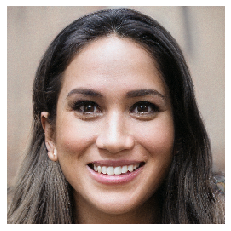

In [18]:
import numpy as np
plt.imshow(generate_image(me))
plt.axis('off')
plt.show()

## Pretrained latent directions

### Pick the latent space manipulation we want to use 

The repo has latent directions like smile, age, and gender built-in, so we'll load those too.

Boundaries: https://github.com/ShenYujun/InterFaceGAN/tree/master/boundaries
* stylegan_ffhq_age_w_boundary.npy
* stylegan_ffhq_eyeglasses_w_boundary.npy
* stylegan_ffhq_gender_w_boundary.npy
* stylegan_ffhq_pose_w_boundary.npy
* stylegan_ffhq_smile_w_boundary.npy

In [0]:
# Loading already learned latent directions
smile_direction = np.load('ffhq_dataset/latent_directions/stylegan_ffhq_smile_w_boundary.npy')
gender_direction = np.load('ffhq_dataset/latent_directions/stylegan_ffhq_gender_w_boundary.npy')
age_direction = np.load('ffhq_dataset/latent_directions/stylegan_ffhq_age_w_boundary.npy')
combine_direction1 = np.load('ffhq_dataset/latent_directions/l1.npy')
combine_direction2 = np.load('ffhq_dataset/latent_directions/l2.npy')

# Character Transformations


Using the latent representation of any character along with the learned latent directions, you can adjust three traits of any character: smile, age, and gender or combine them without reminding any special features.
This is done via the `move_and_show()` function, which takes three arguments: a latent vector, a latent direction, and an array of coefficients. It then performs the following computation:


$$ \text{new latent vector} = \text{latent vector} + (\text{coefficient} * \text{latent direction} )$$


The new latent vectors are passed through the StyleGAN genertor, and the resulting images are plotted. You can refer back to the previous section to go through the implementation of `move_and_show()`.

# Smile transformation

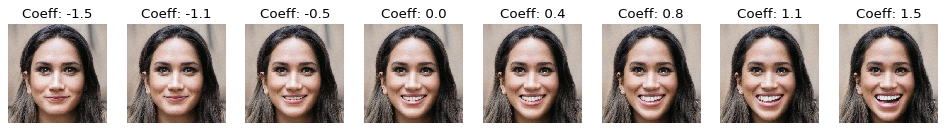

In [20]:
move_and_show(me, smile_direction, [-1.5,-1.1,-0.5, 0,0.4,0.8, 1.1,1.5])

# Gender transformation

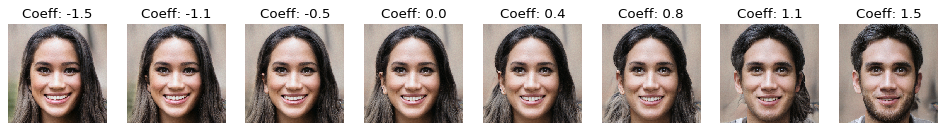

In [21]:
move_and_show(me, gender_direction, [-1.5,-1.1,-0.5, 0,0.4,0.8, 1.1,1.5])

# Age transformation

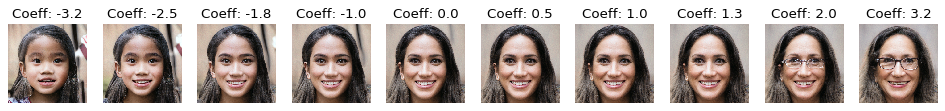

In [22]:
move_and_show(me, age_direction, [-3.2,-2.5,-1.8,-1, 0,0.5,1, 1.3,2,3.2])

# Mixing characters

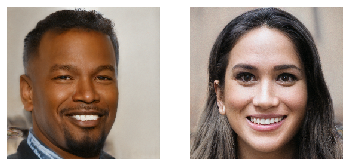

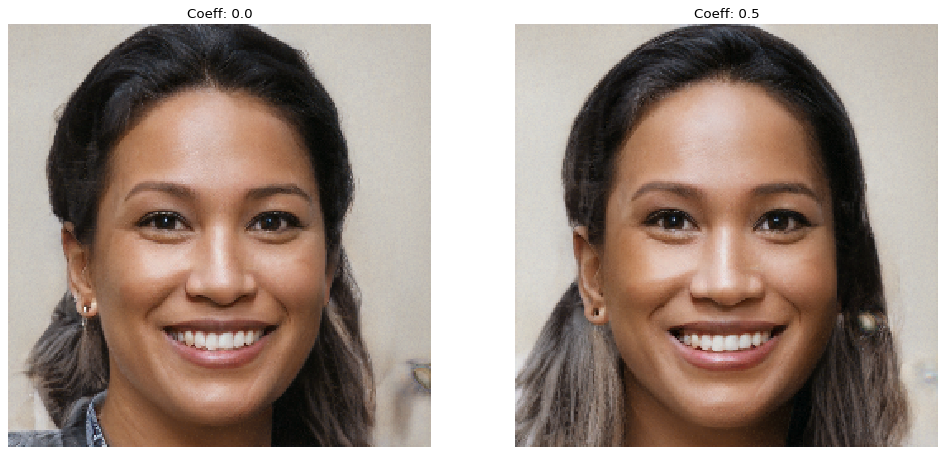

In [27]:
alpha = 0.4
plt.subplot(1,2,1)
mix = (((alpha)*combine_direction1)+((1-alpha)*me))
plt.imshow(generate_image(combine_direction1))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(generate_image(me))
plt.axis('off')
plt.show()
move_and_show(mix, me, [0,0.5])

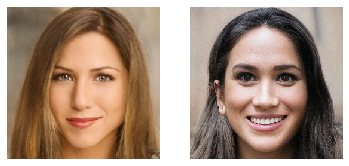

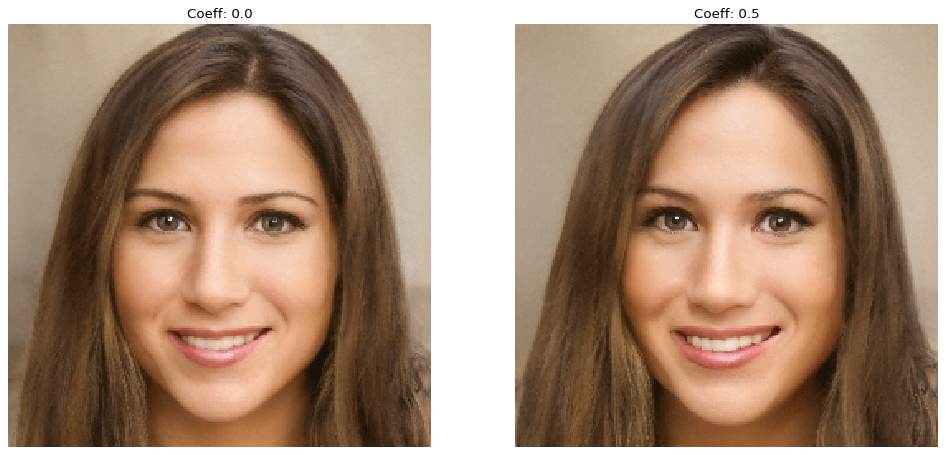

In [38]:
alpha = 0.7
plt.subplot(1,2,1)
mix = (((alpha)*combine_direction2)+((1-alpha)*me))
plt.imshow(generate_image(combine_direction2))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(generate_image(me))
plt.axis('off')
plt.show()
move_and_show(mix, me, [0,0.5])

# turn the results into movies!
These videos perform smooth transitions between various images:

In [0]:
duration_sec = 8.0
smoothing_sec = 1.0
mp4_fps = 20
num_frames = int(np.rint(duration_sec * mp4_fps))

In [0]:
def generate_image_for_video(latent_vector):
    latent_vector = latent_vector.reshape((1, 18, 512))
    generator.set_dlatents(latent_vector)
    img_array = generator.generate_images()[0]

    return img_array
  
  
def move_for_video(latent_vector, direction, coeff):
  
  new_latent_vector = latent_vector.copy()
  new_latent_vector[:8] = (latent_vector + coeff*direction)[:8]
  
  img_array = generate_image(new_latent_vector)
  
  return img_array

In [41]:
# If you're interpolating between two characters, set these characters here


# This creates an nd array that stores all the image frames fot cross-character interpolation
#src_images = np.stack(generate_image_for_video((0.01*alpha*char2)+((1-(0.01*alpha))*char1)) for alpha in range (100))


# Uncomment the next line if you want to do a character transforation video, and choose the arguments as per your requirement
src_images = np.stack(move_for_video(me,age_direction, (0.04*alpha)) for alpha in range (-80,110))


def make_frame(t):
    frame_idx = int(np.clip(np.round(t * mp4_fps), 0, num_frames - 1))
    src_image = src_images[frame_idx]
    return np.array(src_image)

# Generate video.
import moviepy.editor
mp4_file = 'videos/r1.mp4'
mp4_codec = 'libx264'
mp4_bitrate = '5M'

video_clip = moviepy.editor.VideoClip(make_frame, duration=duration_sec)
video_clip.write_videofile(mp4_file, fps=mp4_fps, codec=mp4_codec, bitrate=mp4_bitrate)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)3751936/45929032 bytes (8.2%)8069120/45929032 bytes (17.6%)12181504/45929032 bytes (26.5%)16400384/45929032 bytes (35.7%)20627456/45929032 bytes (44.9%)24682496/45929032 bytes (53.7%)28409856/45929032 bytes (61.9%)32571392/45929032 bytes (70.9%)36757504/45929032 bytes (80.0%)41091072/45929032 bytes (89.5%)45170688/45929032 bytes (98.3%)45929032/45929032 bytes (100.0%)
  Done
File saved as /root

 99%|█████████▉| 160/161 [00:01<00:00, 152.99it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: videos/r1.mp4 



In [42]:
from moviepy.editor import *
video_file_to_show = 0
clip = VideoFileClip('videos/r1.mp4' )
clip.ipython_display(height=512, autoplay=0, loop=1)

 99%|█████████▉| 160/161 [00:00<00:00, 350.35it/s]
